EXPLORING NUTRITIONAL COMPOSITION AND RATINGS: A COMPREHENSIVE CEREAL DATASET ANALYSIS IN PYTHON

In-depth Exploratory Data Analysis (EDA) of a comprehensive cereal dataset. This dataset encapsulates a myriad of cereal attributes, comprising nutritional information, manufacturer details, and ratings. It is meticulously structured with fields encompassing cereal names, manufacturer classifications, nutritional components (such as calories, protein, fat), alongside additional particulars like shelf placement, weight, and serving sizes.

Throughout this notebook, our endeavor is to meticulously explore this dataset, unearthing profound insights. We shall embark on comparisons between various cereal brands, scrutinize nutritional patterns influencing ratings, and potentially develop predictive models for cereal ratings based on their nutritional composition. Join us on this analytical journey as we unravel the intricate world of cereals through a data-centric lens.

1. Importing Libraries and Loading the Data

In [6]:
import numpy as np                # linear algebra
import pandas as pd               # data frames
import seaborn as sns             # visualizations
import matplotlib.pyplot as plt   # visualizations
import scipy.stats                # statistics
from sklearn import preprocessing

df=pd.read_csv('D:/cognorise_assignment/Cereal/cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [8]:
df.shape

(77, 16)

2. Basic Exploratory Data Analysis

In [9]:
df.iloc[:,~df.columns.isin(['name','mfr','type','rating'])].describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000


In [10]:
pd.DataFrame(df['mfr'].value_counts(dropna=False))

,count
mfr,
K,23
G,22
P,9
Q,8
R,8
N,6
A,1


Product Ranking

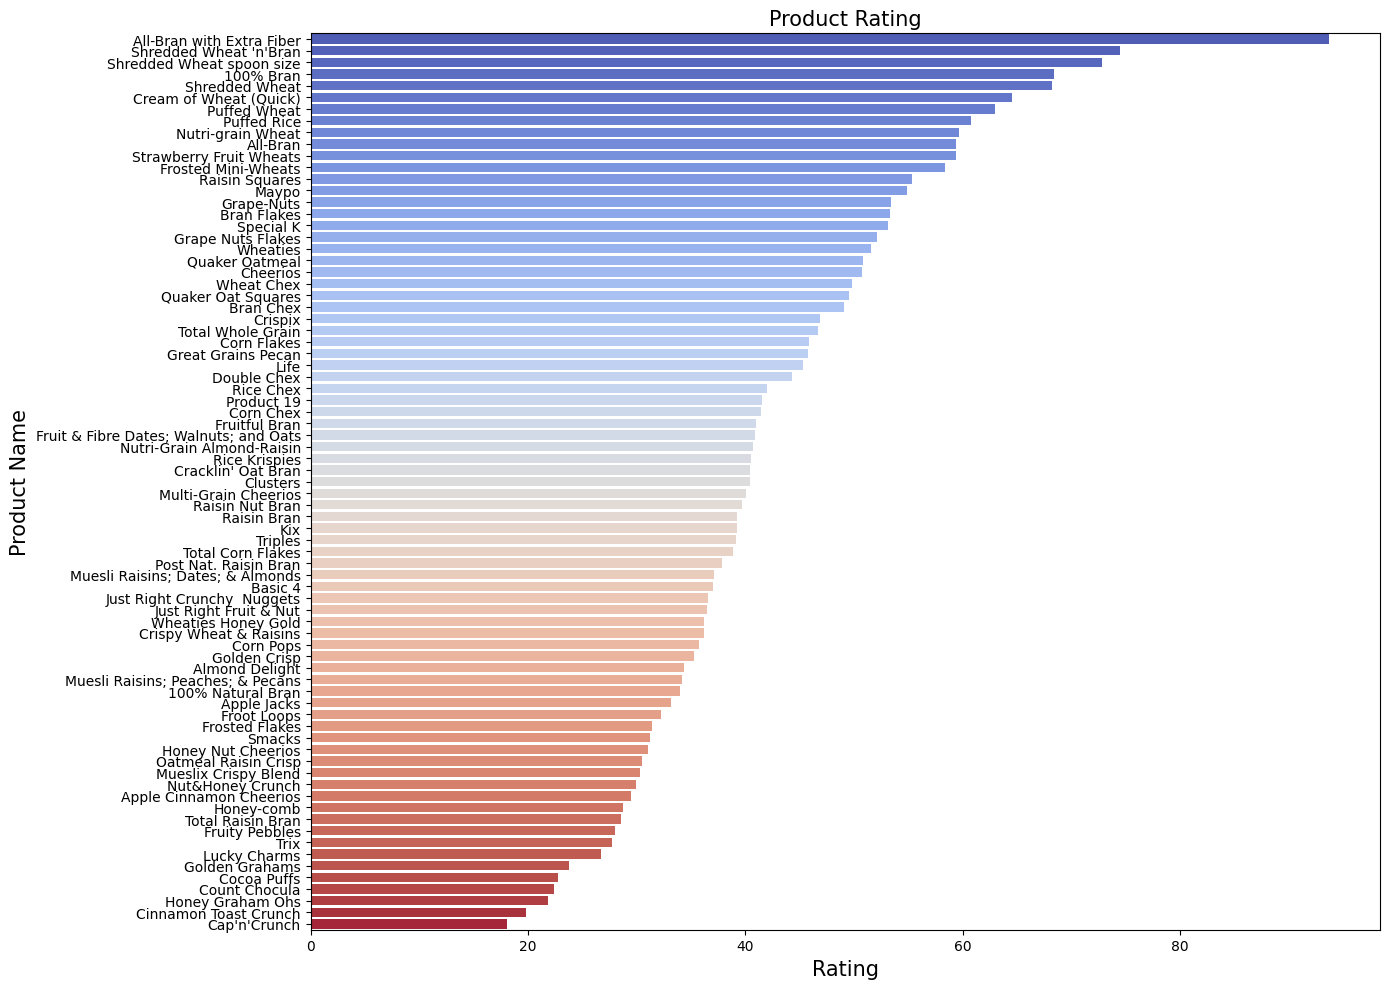

In [39]:
custom_colors = sns.color_palette("coolwarm", len(df))
# Sort the DataFrame by 'rating'
df = df.sort_values(['rating'], ascending=False).reset_index(drop=True)
# Create a hue column based on 'name'
df['hue_column'] = df['name']
# Create the barplot using 'hue_column'
fig, ax = plt.subplots(figsize=(14, 10))
sns.barplot(x='rating', y='name', data=df, palette=custom_colors, hue='hue_column', ax=ax, legend=False)
# Set labels and title
plt.xlabel("Rating", fontsize=15)
plt.ylabel("Product Name", fontsize=15)
plt.title("Product Rating", fontsize=15)

plt.tight_layout()
plt.show()


<Axes: xlabel='type', ylabel='count'>

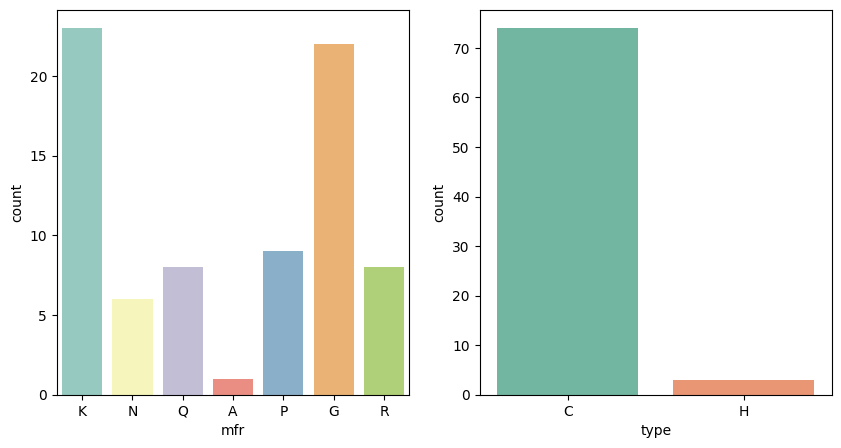

In [37]:
# Barcharts to understand the categorical variables
f, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x="mfr", data=df, ax=axes[0], palette="Set3", hue='mfr', legend=False)
sns.countplot(x="type", data=df, ax=axes[1], palette="Set2", hue='type', legend=False)

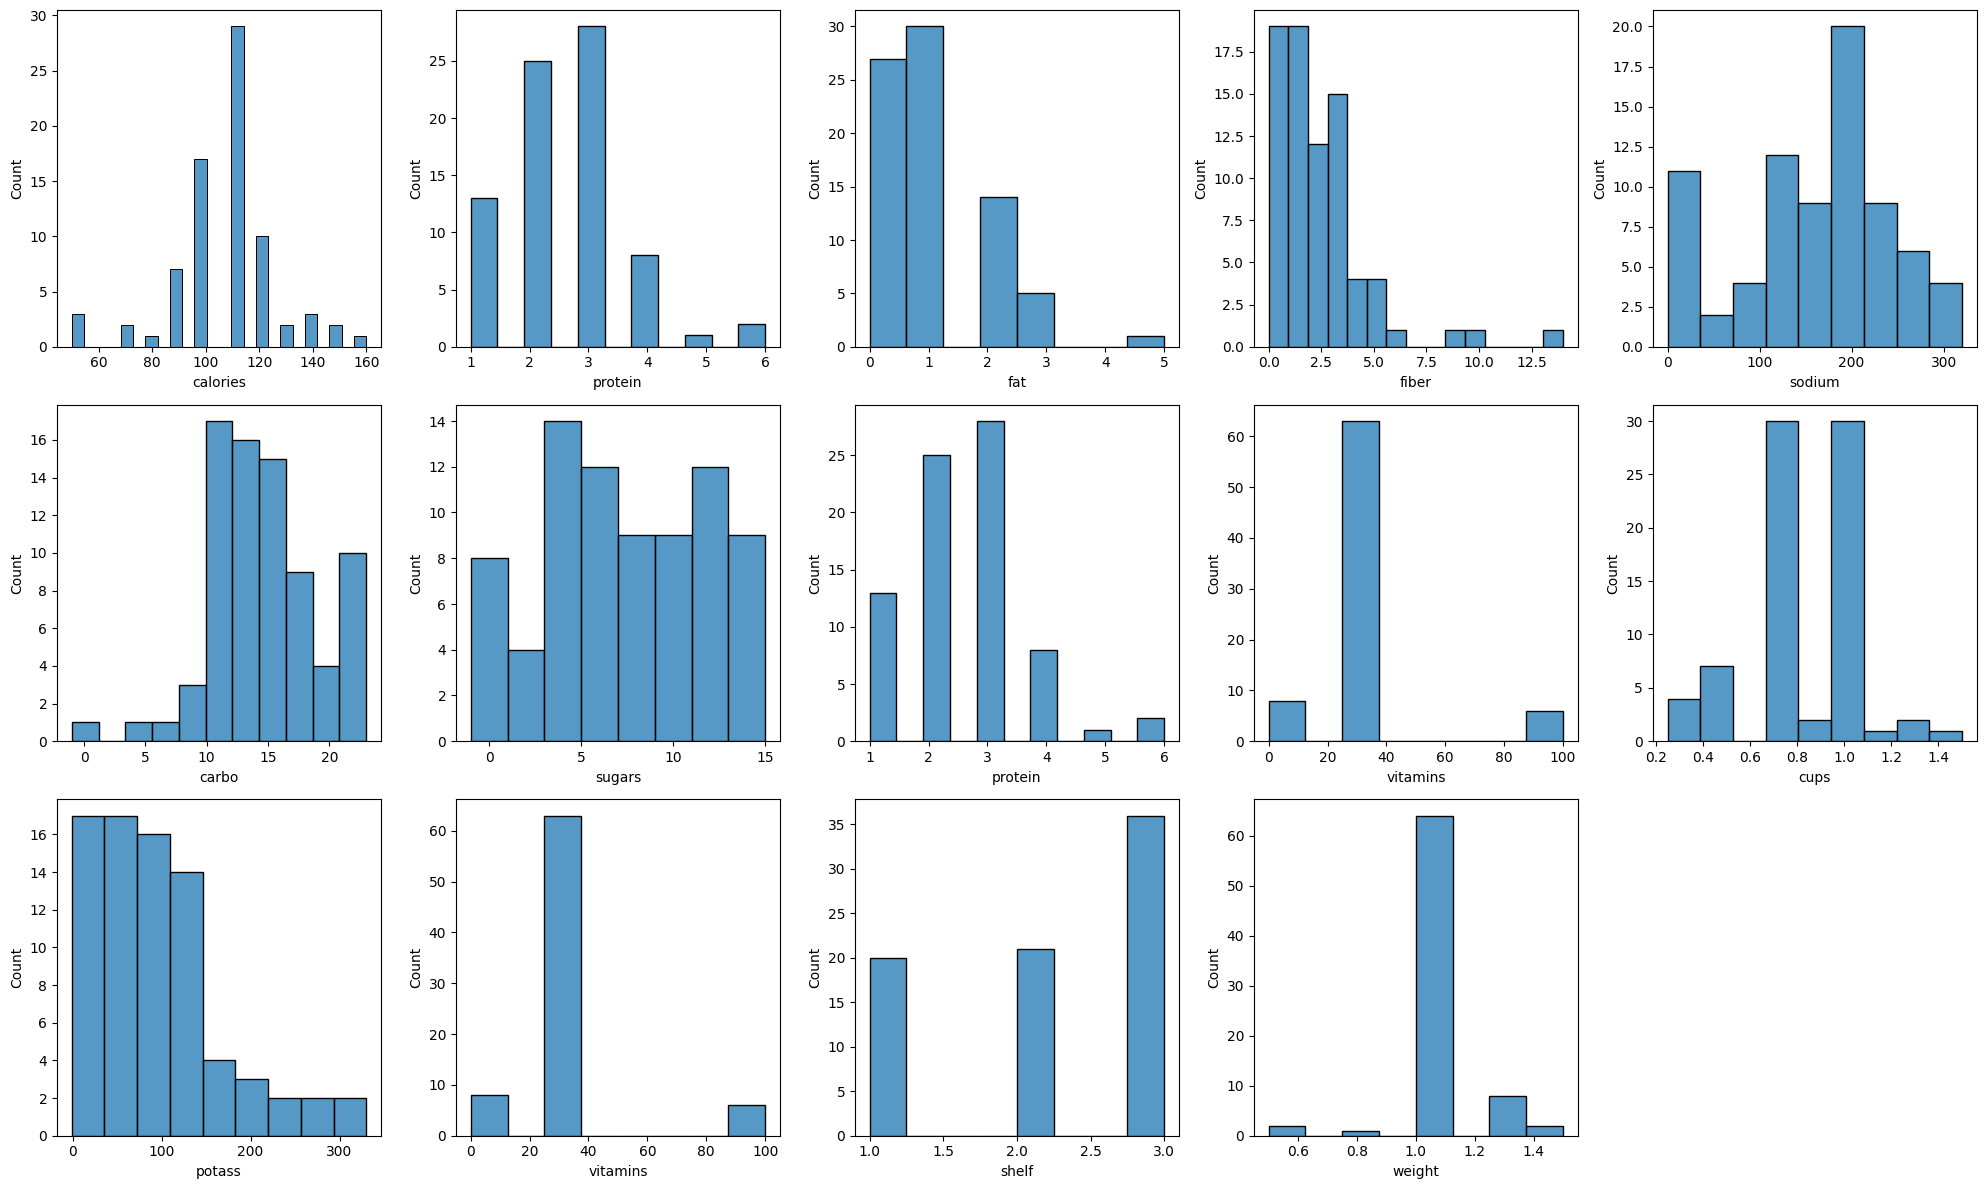

In [41]:
# Histogram to understand the data using histplot (axes-level function)
import seaborn as sns
import matplotlib.pyplot as plt
# Creating a grid of subplots
fig, axes = plt.subplots(3, 5, figsize=(20, 12))

# Plotting histograms for different columns
sns.histplot(df["calories"], ax=axes[0, 0])
sns.histplot(df["protein"], ax=axes[0, 1])
sns.histplot(df["fat"], ax=axes[0, 2])
sns.histplot(df["fiber"], ax=axes[0, 3])
sns.histplot(df["sodium"], ax=axes[0, 4])
sns.histplot(df["carbo"], ax=axes[1, 0])
sns.histplot(df["sugars"], ax=axes[1, 1])
sns.histplot(df["protein"], ax=axes[1, 2])
sns.histplot(df["vitamins"], ax=axes[1, 3])
sns.histplot(df["cups"], ax=axes[1, 4])
sns.histplot(df["potass"], ax=axes[2, 0])
sns.histplot(df["vitamins"], ax=axes[2, 1])
sns.histplot(df["shelf"], ax=axes[2, 2])
sns.histplot(df["weight"], ax=axes[2, 3])

# Remove the empty subplot in the last row, last column
fig.delaxes(axes[2, 4])

plt.tight_layout()
plt.show()


<Axes: xlabel='mfr', ylabel='cups'>

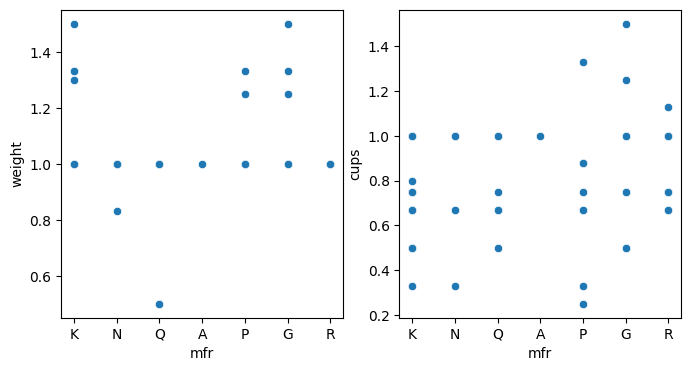

In [48]:
#Scatterplot
f, axes = plt.subplots(1,2, figsize=(8, 4))
sns.scatterplot(x="mfr", y="weight", data=df, ax=axes[0])
sns.scatterplot(x="mfr", y="cups", data=df, ax=axes[1])

It appears that the nutritional information is provided per serving, and serving sizes may differ across cereals. We should standardize these variables to enable a fair comparison between different cereals.

In [51]:
df.loc[df['name'].isin(['All-Bran','Lucky Charms','Puffed Wheat'])]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,hue_column
6,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.5,1.00,63.005645,Puffed Wheat
9,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,All-Bran
70,Lucky Charms,G,C,110,2,1,180,0.0,12.0,12,55,25,2,1.0,1.00,26.734515,Lucky Charms


The best approach seems to be comparing their weights.

In [55]:
# Ensure 'weight' column is numeric
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')

# Columns to normalize
cols_to_normalize = df.columns[~df.columns.isin(['name', 'mfr', 'type', 'rating', 'weight'])]

# Convert columns to numeric
df[cols_to_normalize] = df[cols_to_normalize].apply(pd.to_numeric, errors='coerce')

# Normalize numeric columns by 'weight'
cereals = df.copy()  # Create a copy of the DataFrame to preserve original data
cereals[cols_to_normalize] = cereals[cols_to_normalize].div(cereals['weight'], axis=0)

# Display the head of the normalized DataFrame
cereals.head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,hue_column
0,All-Bran with Extra Fiber,K,C,50.000000,4.000000,0.0,140.0,14.000000,8.000000,0.0,330.000000,25.0,3.000000,1.00,0.500000,93.704912,NaN
1,Shredded Wheat 'n'Bran,N,C,90.000000,3.000000,0.0,0.0,4.000000,19.000000,0.0,140.000000,0.0,1.000000,1.00,0.670000,74.472949,NaN
2,Shredded Wheat spoon size,N,C,90.000000,3.000000,0.0,0.0,3.000000,20.000000,0.0,120.000000,0.0,1.000000,1.00,0.670000,72.801787,NaN
3,100% Bran,N,C,70.000000,4.000000,1.0,130.0,10.000000,5.000000,6.0,280.000000,25.0,3.000000,1.00,0.330000,68.402973,NaN
4,Shredded Wheat,N,C,96.385542,2.409639,0.0,0.0,3.614458,19.277108,0.0,114.457831,0.0,1.204819,0.83,1.204819,68.235885,NaN


<Axes: >

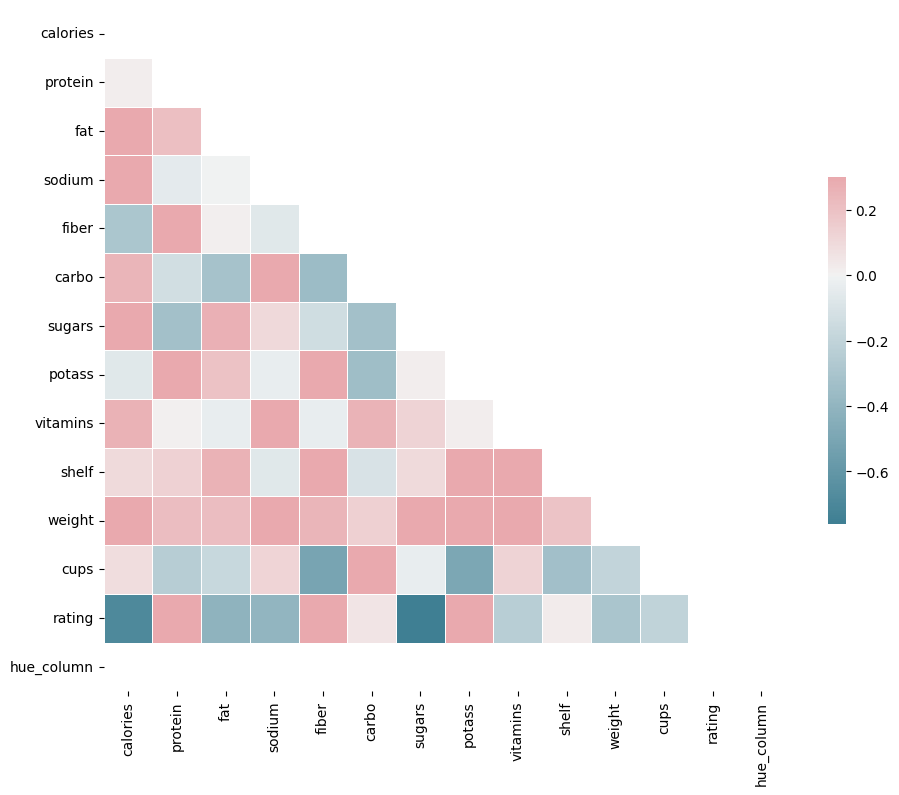

In [57]:
# Compute the correlation matrix
corr = df.iloc[:, ~cereals.columns.isin(['name', 'mfr', 'type'])].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


Fiber and protein have a little correlation with the consumer preference while calories and sugars influence the most.

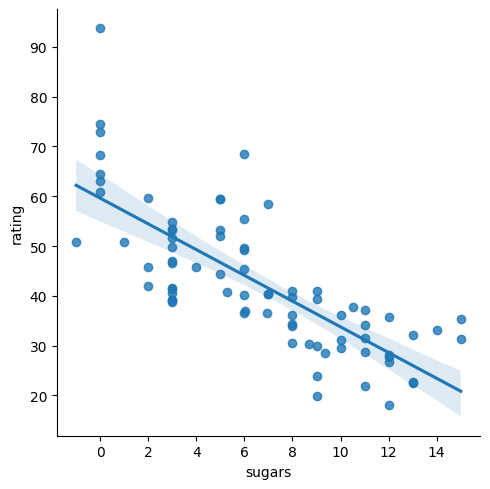

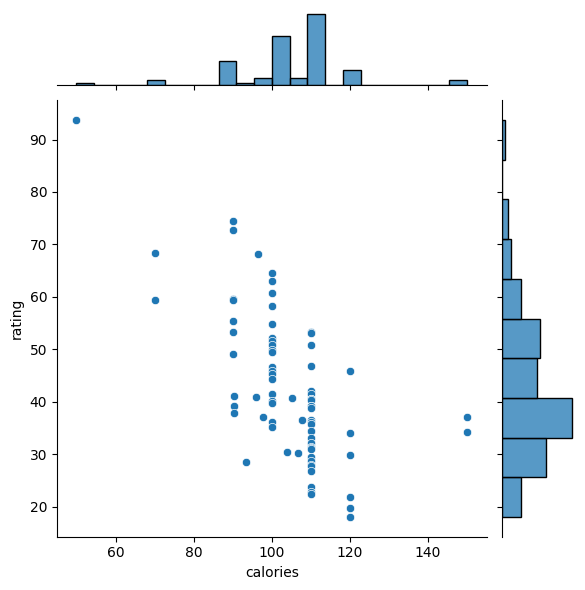

In [58]:
sns.lmplot(x="sugars",y="rating",data=cereals)
sns.jointplot(x="calories", y="rating", data=cereals)

Data Transformations

With standardized variables across cereals, we aim to create a holistic view of each cereal, amalgamating all features. This process enables us to derive new features from the existing variables.

In [62]:
# Make a copy of the DataFrame to retain the original data
cereals_scale = cereals.copy()

# Replace NaN or infinite values with zeros
cereals_scale.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

# Initialize StandardScaler
scaler = preprocessing.StandardScaler()

# Select columns for scaling excluding non-essential columns
columns = cereals_scale.columns[3:]

# Scale the selected columns
cereals_scale[columns] = scaler.fit_transform(cereals_scale[columns])

# Display the head of the scaled DataFrame
cereals_scale.head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,hue_column
0,All-Bran with Extra Fiber,K,C,-3.923731,1.400917,-0.989748,-0.162433,5.224244,-1.416568,-1.586540,3.717234,-0.091928,0.819649,-0.198067,-1.037360,3.657211,0.0
1,Shredded Wheat 'n'Bran,N,C,-1.017097,0.472634,-0.989748,-1.865000,0.851736,1.009584,-1.586540,0.757082,-1.318770,-1.210975,-0.198067,-0.496150,2.279146,0.0
2,Shredded Wheat spoon size,N,C,-1.017097,0.472634,-0.989748,-1.865000,0.414485,1.230143,-1.586540,0.445487,-1.318770,-1.210975,-0.198067,-0.496150,2.159399,0.0
3,100% Bran,N,C,-2.470414,1.400917,0.033481,-0.284045,3.475241,-2.078246,-0.134438,2.938247,-0.091928,0.819649,-0.198067,-1.578569,1.844202,0.0
4,Shredded Wheat,N,C,-0.553086,-0.075388,-0.989748,-1.865000,0.683157,1.070703,-1.586540,0.359141,-1.318770,-1.003019,-1.335218,1.206492,1.832229,0.0


Introducing Additional Metrics: 
In our assessment of individual cereals, we're introducing two fresh variables: 

1. Assessment of Nutritional Composition: A measure reflecting the quality of ingredients in each cereal.
2. Key Ingredient Emphasis: Identifying the most significant ingredient in each cereal.

In [63]:
#Finding the average of good and bad ingredients
cereals_scale['Good'] = cereals_scale.loc[:,['protein','fiber','vitamins']].mean(axis=1)
#Good: the bigger the better.
cereals_scale['Bad'] = cereals_scale.loc[:,['fat','sodium','potass', 'sugars']].mean(axis=1)
#Multiply by negative to make this indicator the bigger the worse.
cereals_scale.loc[cereals_scale['name'].isin(['All-Bran','Lucky Charms','Puffed Wheat'])]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,hue_column,Good,Bad
6,Puffed Wheat,Q,C,-0.290439,1.400917,-0.989748,-1.865000,-0.022766,1.230143,-1.586540,0.133892,-1.318770,3.865585,-3.542628,3.738018,1.457457,0.0,0.019794,-1.076849
9,All-Bran,K,C,-2.470414,1.400917,0.033481,1.296909,3.037990,-1.637128,-0.376455,3.561437,-0.091928,0.819649,-0.198067,-1.578569,1.200922,0.0,1.448993,1.128843
70,Lucky Charms,G,C,0.436220,-0.455649,0.033481,0.324014,-0.897267,-0.534331,1.317664,-0.567197,-0.091928,-0.195663,-0.198067,0.554433,-1.141548,0.0,-0.481615,0.276990


<Figure size 1400x1400 with 0 Axes>

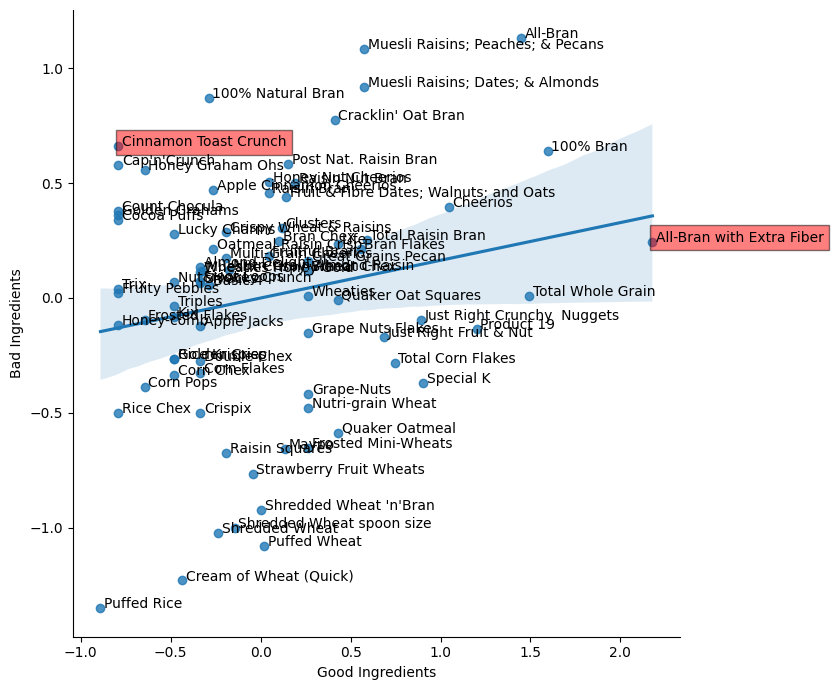

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming cereals_scale contains the necessary data

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if point['val'] in ['All-Bran with Extra Fiber', 'Cinnamon Toast Crunch']:
            ax.text(point['x']+.02, point['y'], str(point['val']), bbox=dict(facecolor='red', alpha=0.5))
        else:
            ax.text(point['x']+.02, point['y'], str(point['val']))

plt.figure(figsize=(14, 14))
# Plotting the linear regression graph with brand names
sns.lmplot(x='Good', y='Bad', data=cereals_scale, fit_reg=True, height=7)
plt.xlabel('Good Ingredients')
plt.ylabel('Bad Ingredients')
label_point(cereals_scale.Good, cereals_scale.Bad, cereals_scale.name, plt.gca()) 
plt.show()


In this scenario, a linear regression boundary illustrates the connection between favorable and unfavorable nutrients within a cereal. Undoubtedly, among its ingredients, All-Brand with Extra Fiber stands out as the best cereal, while Cinnamon Toast Crunch emerges as the least favorable option.

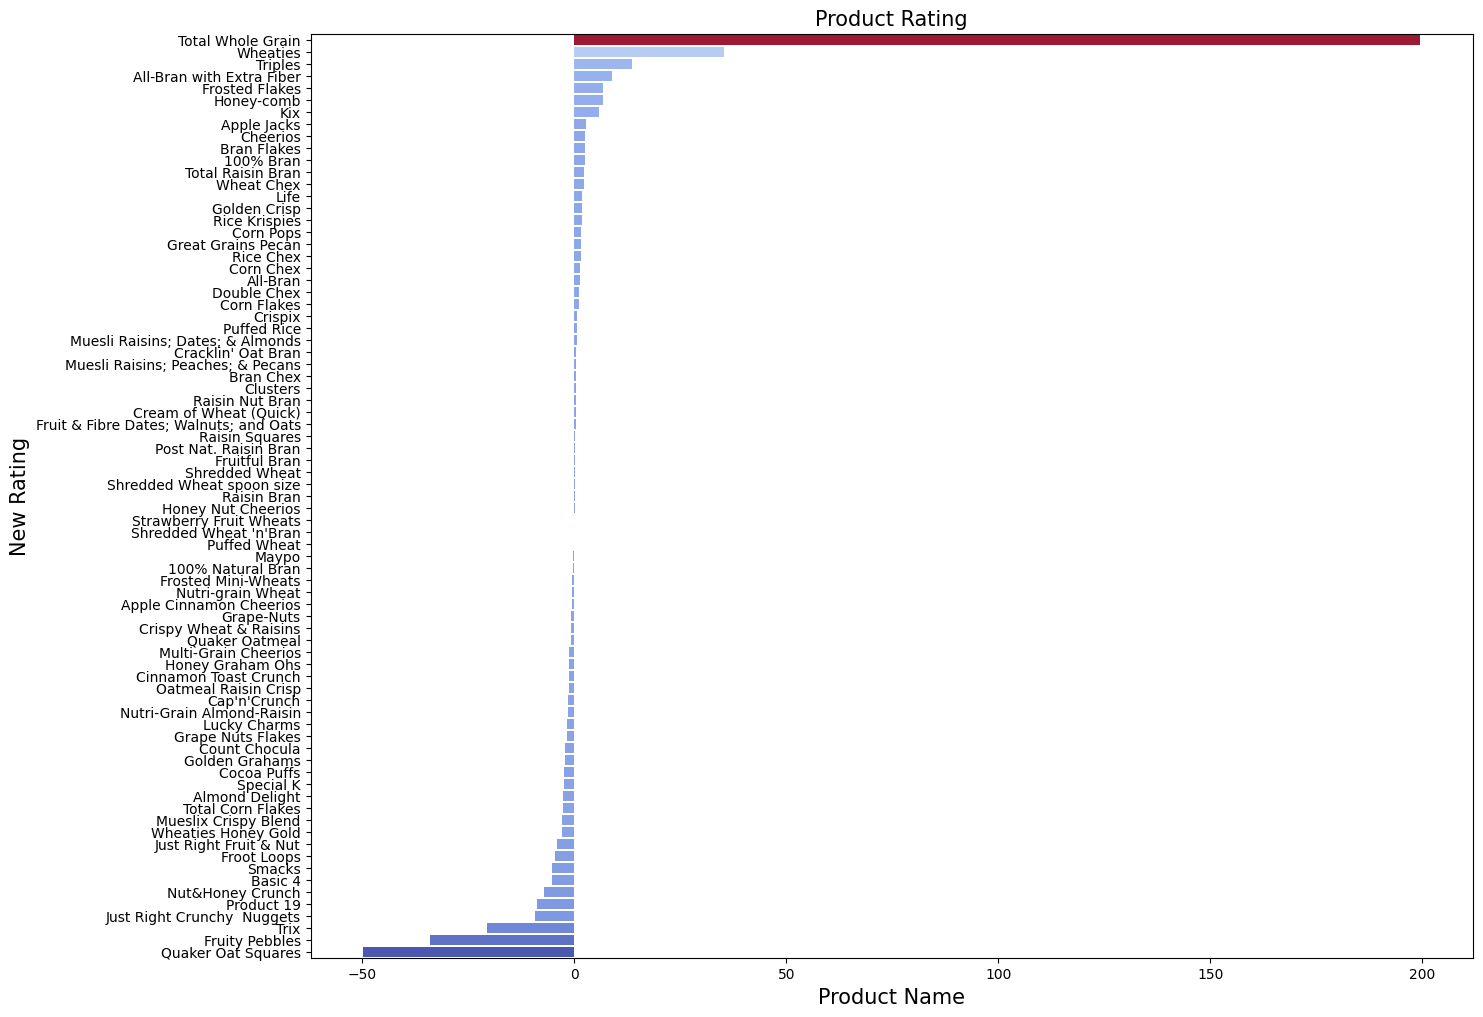

In [81]:
# Finding a proxy of Sharpe Ratio good/bad to make a new ranking
cereals_scale['new_ranking'] = cereals_scale['Good'] / cereals_scale['Bad']

# Visualization of the new ranking
new_cereals = cereals_scale.sort_values(['new_ranking'], ascending=False).reset_index(drop=True)
plt.figure(figsize=(15, 12))
sns.barplot(x='new_ranking', y='name', hue='new_ranking', data=new_cereals, palette='coolwarm', legend=False)
plt.xlabel("Product Name", fontsize=15)
plt.ylabel("New Rating", fontsize=15)
plt.title("Product Rating", fontsize=15)
plt.show()


In [83]:
#Finding the most characteristic ingredient in each cereal
def knownby (row):
    maxValue = max(map(abs, pd.Series.tolist(row)[4:12]))
    try:
        index = pd.Series.tolist(row).index(maxValue)
    except ValueError:
        index = pd.Series.tolist(row).index(-maxValue)        
    return index

cereals_scale['knowby']=cereals_scale.apply(lambda row: knownby (row),axis=1)
cereals_scale['knowby']=cereals_scale.columns[cereals_scale['knowby']]
cereals_scale.loc[cereals_scale['name'].isin(['All-Bran','Lucky Charms','Puffed Wheat'])]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,...,vitamins,shelf,weight,cups,rating,hue_column,Good,Bad,new_ranking,knowby
6,Puffed Wheat,Q,C,-0.290439,1.400917,-0.989748,-1.865000,-0.022766,1.230143,-1.586540,...,-1.318770,3.865585,-3.542628,3.738018,1.457457,0.0,0.019794,-1.076849,-0.018381,sodium
9,All-Bran,K,C,-2.470414,1.400917,0.033481,1.296909,3.037990,-1.637128,-0.376455,...,-0.091928,0.819649,-0.198067,-1.578569,1.200922,0.0,1.448993,1.128843,1.283609,potass
70,Lucky Charms,G,C,0.436220,-0.455649,0.033481,0.324014,-0.897267,-0.534331,1.317664,...,-0.091928,-0.195663,-0.198067,0.554433,-1.141548,0.0,-0.481615,0.276990,-1.738741,sugars


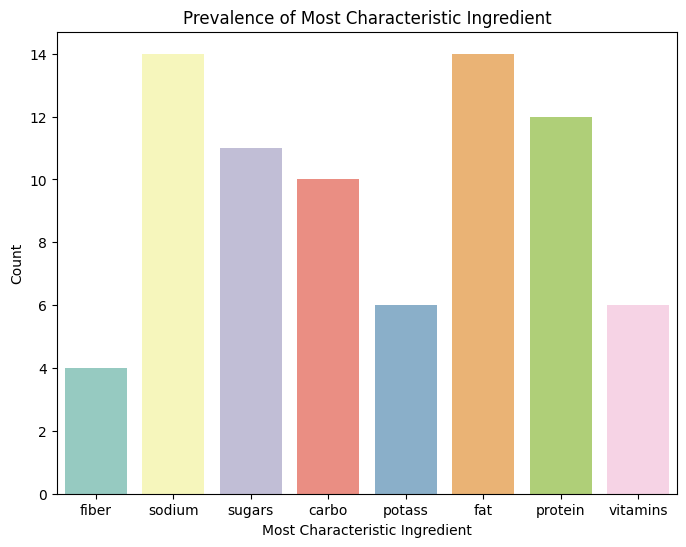

In [86]:
import matplotlib.pyplot as plt

# Create a count plot for ingredient prevalence using 'x' as 'hue'
plt.figure(figsize=(8, 6))
sns.countplot(x='knowby', hue='knowby', data=cereals_scale, palette='Set3', legend=False)
plt.xlabel('Most Characteristic Ingredient')
plt.ylabel('Count')
plt.title('Prevalence of Most Characteristic Ingredient')

plt.show()